In [193]:
from sklearn import tree
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [46]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display 

from IPython.display import HTML
style = "<style>{width:50% !important; height:10% !important;}</style>"
HTML(style)

In [2]:
titanic_data = pd.read_csv('train.csv')

In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [179]:
X = titanic_data.drop(['PassengerId', 'Survived','Ticket','Name','Cabin'], axis = 1)
y = titanic_data.Survived

In [180]:
X = pd.get_dummies(X)

In [181]:
X = X.fillna({'Age': X.Age.median()})

In [112]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
5,3,28.0,0,0,8.4583,0,1,0,1,0
6,1,54.0,0,0,51.8625,0,1,0,0,1
7,3,2.0,3,1,21.0750,0,1,0,0,1
8,3,27.0,0,2,11.1333,1,0,0,0,1
9,2,14.0,1,0,30.0708,1,0,1,0,0


In [59]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [60]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

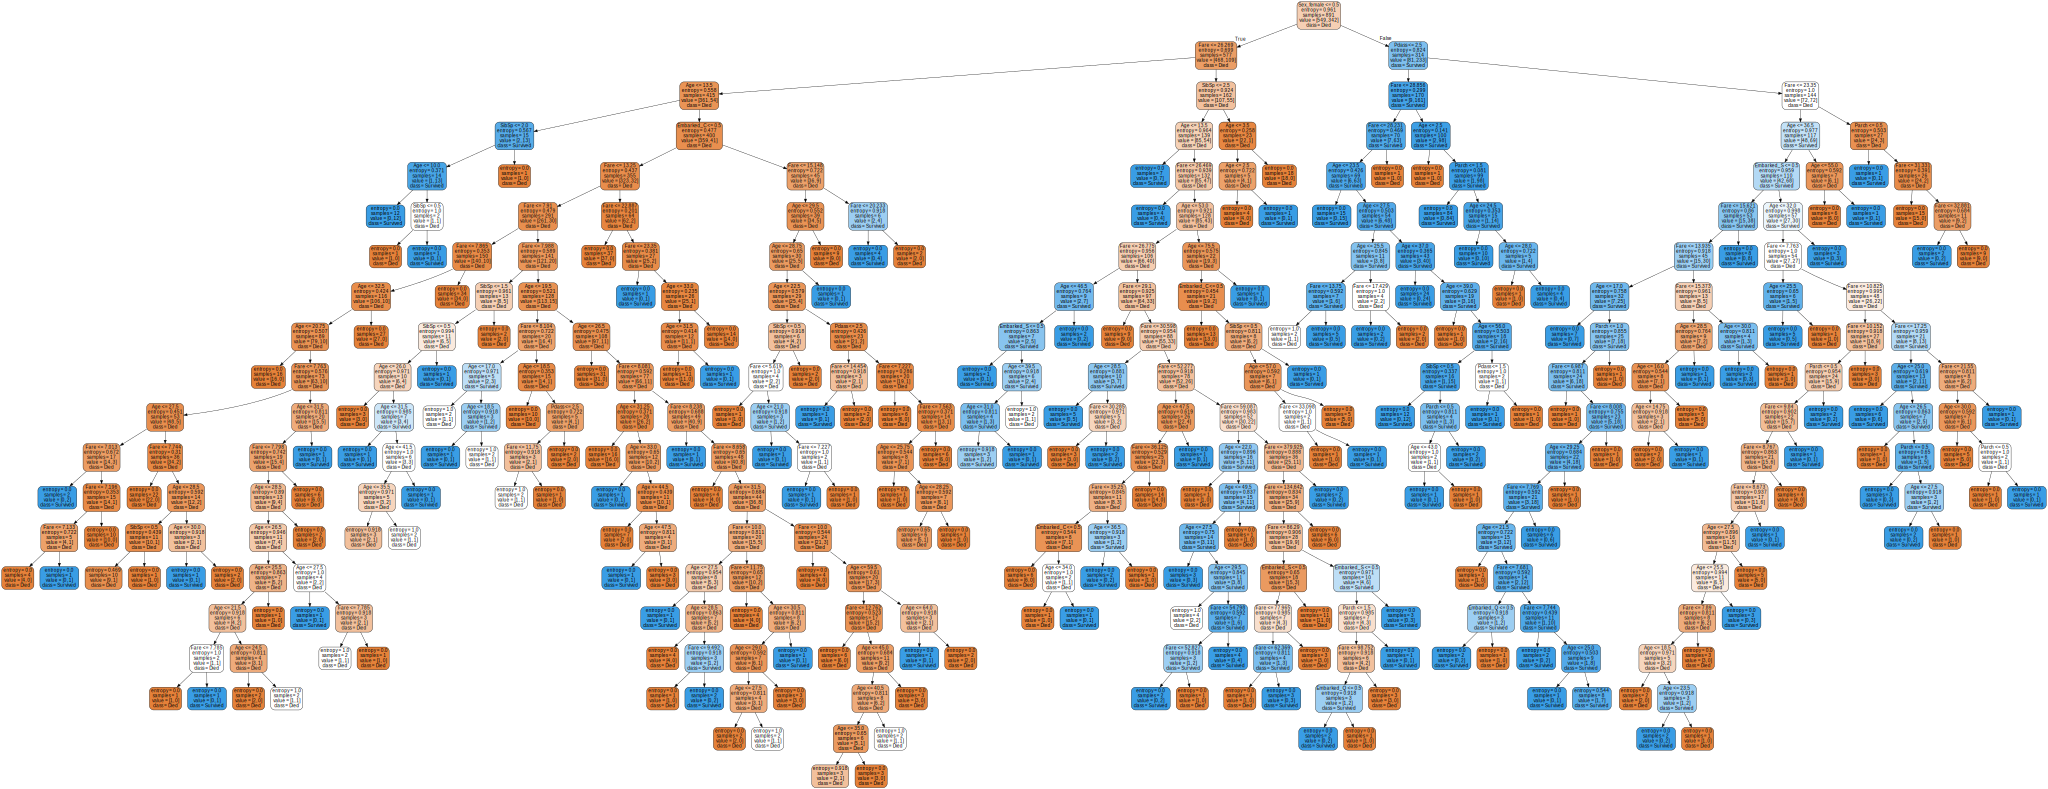

In [47]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                          feature_names=list(X),
                          class_names=['Died','Survived'],
                          filled = True, rounded = True))
display(SVG(graph.pipe(format='svg')))

In [48]:
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [61]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
clf.score(X_train, y_train)

0.8238255033557047

In [65]:
clf.score(X_test, y_test)

0.8203389830508474

In [71]:
max_depth_values = range(1, 100)

In [82]:
scores_data = pd.DataFrame()

In [83]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score' : [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [85]:
scores_data.head()

,max_depth,test_score,train_score
0,1,0.796610,0.781879
0,2,0.776271,0.805369
0,3,0.820339,0.823826
0,4,0.823729,0.833893
0,5,0.806780,0.840604


In [87]:
scores_data = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                     var_name='set_type', value_name='score')

In [88]:
scores_data.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


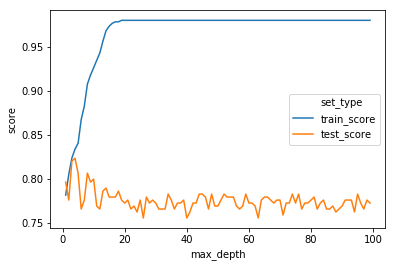

In [90]:
sns.lineplot(x = 'max_depth',y='score', hue='set_type', data=scores_data)

# 2.5 Песни и артисты

In [95]:
from sklearn import tree
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import precision_score

In [139]:
sample = pd.read_csv('songs.csv').drop(columns={'lyrics','year','song'})

In [141]:
sample.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [118]:
X = sample.drop(['artist'], axis = 1)
y = sample.artist

In [121]:
X = pd.get_dummies(X)

In [125]:
X.head()

,length,commas,exclamations,colons,hyphens,genre_Hip-Hop,genre_Metal,genre_Pop
0,1300,24,5,0,11,1,0,0
1,1566,0,0,0,0,0,1,0
2,996,1,0,1,0,0,1,0
3,2868,5,0,0,0,0,1,0
4,3351,22,0,0,3,1,0,0


In [126]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [127]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [130]:
clf.score(X,y)

1.0

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [142]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [143]:
predict = clf.predict(X_test)

In [144]:
precision_score(predict, y_test, average='micro')

1.0

In [176]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

sample = pd.read_csv('songs.csv')
X = sample.drop(['artist'], axis = 1)
y = sample.artist
X = pd.get_dummies(X)

clf = DecisionTreeClassifier(criterion='entropy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
precision = precision_score(predictions, y_test, average='micro')



# 2.6 

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
clf = tree.DecisionTreeClassifier()

In [152]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [153]:
grid_search_cv_clf = GridSearchCV(clf, param_grid=parametrs, cv = 5)

In [164]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [173]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 14}

In [170]:
best_clf = grid_search_cv_clf.best_estimator_

In [185]:
best_clf.score(X_test, y_test)

0.7762711864406779

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [174]:
y_pred = best_clf.predict(X_test)

In [211]:
precision_score(y_test, y_pred)

0.717741935483871

In [212]:
recall_score(y_test, y_pred)

0.7416666666666667

In [186]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [196]:
y_predicted_prob

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.97777778, 0.02222222],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.9       , 0.1       ],
       [0.97777778, 0.02222222],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.

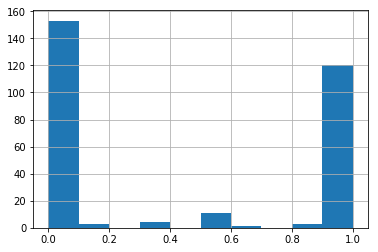

In [189]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [210]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.5, 1, 0)

In [213]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([1.        , 0.        , 0.5       , 0.83333333, 0.02222222,
       0.1       , 0.09090909, 0.375     , 0.33333333, 0.66666667])

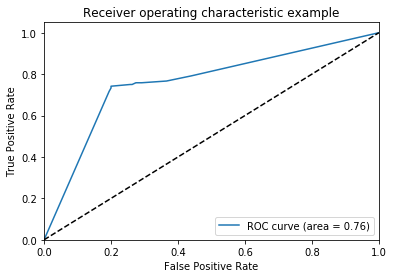

In [217]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 2.4

In [221]:
sample = pd.read_csv('train_data_tree.csv')

In [222]:
sample.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [224]:
X = sample[['sex','exang']]
y = sample.num

In [227]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [228]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [230]:
clf.score(X,y)

0.7016806722689075

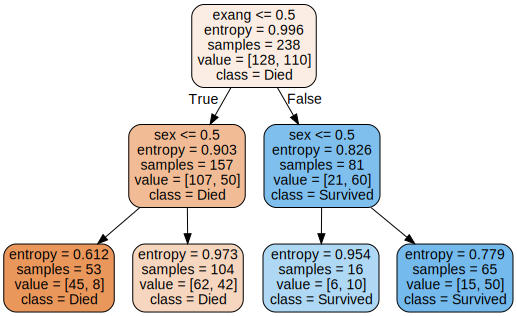

In [236]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                          feature_names=list(X),
                          class_names=['Died','Survived'],
                          filled = True, rounded = True))
display(SVG(graph.pipe(format='svg')))

In [256]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [243]:
predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [259]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
dt = DecisionTreeClassifier()

parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 10), 'min_samples_split': range(2,10), 'min_samples_leaf': range(1,10)}

search = GridSearchCV(dt, param_grid=parametrs, cv=5)
search.fit(X_train, y_train)

best_tree = search.best_estimator_

/data/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# 2.9

In [262]:
events_data = pd.read_csv('event_data_train.csv')
submissions_data = pd.read_csv('submissions_data_train.csv')

In [280]:
max_subm_ts = submissions_data.groupby('user_id',as_index=False) \
                .agg({'timestamp':'max'})\

In [286]:
last_subm = submissions_data.merge(max_subm_ts, how='inner')\

In [289]:
last_subm = last_subm[last_subm.submission_status == 'wrong']

In [306]:
last_subm.groupby('step_id').count().sort_values('user_id', ascending=0)

,timestamp,submission_status,user_id
step_id,,,
31978,154,154,154
32812,133,133,133
32031,97,97,97
32202,92,92,92
33481,78,78,78
31977,60,60,60
32173,47,47,47
31972,45,45,45
31971,43,43,43


In [301]:
max_events_data = events_data.groupby('user_id',as_index=False) \
                .agg({'timestamp':'max'})\

# 3.2

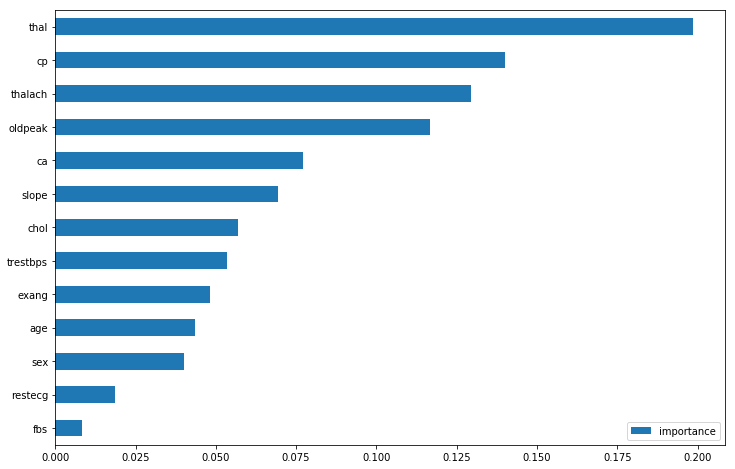

In [330]:
from sklearn.ensemble import RandomForestClassifier

heart = pd.read_csv('heart.csv')
x_train = heart.drop('target', axis = 1)
y_train = heart.target
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)
rf.fit(x_train, y_train)

imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

# 3.5

In [331]:
training_mush = pd.read_csv('training_mush.csv')

In [332]:
training_mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [ ]:
training_mush = pd.read_csv('training_mush.csv')
training_mush.head()

In [ ]:
x = training_mush.drop('class', axis = 1)
y = training_mush['class']

In [339]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
dt = RandomForestClassifier(random_state=0)

parametrs = {'n_estimators': range(10,50,10), 'max_depth': range(1, 12, 2), 'min_samples_split': range(2,9,2), 'min_samples_leaf': range(1,7)}

search = GridSearchCV(dt, param_grid=parametrs, cv=3)
search.fit(x, y)

best_tree = search.best_estimator_

In [340]:
best_tree

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [346]:
feature_importance = best_tree.feature_importances_

In [347]:
feature_importance_df = pd.DataFrame({'feature': list(x),
                                   'feature_importance': feature_importance})

In [360]:
feature_importance_df.sort_values('feature_importance', ascending=False)

,feature,feature_importance
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [361]:
testing_mush = pd.read_csv('testing_mush.csv')
testing_mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [362]:
x_test = testing_mush

In [363]:
y_predict = best_tree.predict(x_test)

In [368]:
unique, counts = np.unique(y_predict, return_counts=True)

In [370]:
unique

array([0, 1])

In [375]:
corr = pd.read_csv('testing_y_mush.csv')

In [376]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(corr, y_predict)

In [377]:
conf_matrix

array([[1055,    0],
       [   0,  976]])

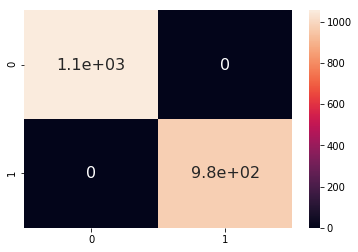

In [379]:
import seaborn as sns

sns.heatmap(conf_matrix, annot=True,annot_kws={"size": 16})

In [380]:
invasion = pd.read_csv('invasion.csv')

In [383]:
invasion.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [384]:
x = invasion.drop('class', axis = 1)
y = invasion['class']

In [385]:
dt = RandomForestClassifier(random_state=0)

parametrs = {'n_estimators': range(10,50,10), 'max_depth': range(1, 12, 2), 'min_samples_split': range(2,9,2), 'min_samples_leaf': range(1,7)}

search = GridSearchCV(dt, param_grid=parametrs, cv=3)
search.fit(x, y)

best_tree = search.best_estimator_

In [386]:
x_test = pd.read_csv('operative_information.csv')

In [387]:
y_pred = search.predict(x_test)

In [389]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{'cruiser': 230, 'fighter': 675, 'transport': 595}

In [390]:
feature_importance = best_tree.feature_importances_

In [393]:
feature_importance_df = pd.DataFrame({'feature': list(x),
                                   'feature_importance': feature_importance})

In [394]:
feature_importance_df.sort_values('feature_importance', ascending=False)

,feature,feature_importance
3,brightness,0.363803
5,volume,0.257661
2,speed,0.171441
1,i_reflection,0.124372
0,g_reflection,0.082723
4,time_of_observance,0.000000


In [395]:
space_dangerous = pd.read_csv('space_can_be_a_dangerous_place.csv')

In [396]:
space_dangerous.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [415]:
x = space_dangerous.drop(['r','phi','dustiness','peradventure_index','dangerous'], axis = 1)
y = space_dangerous.dangerous

In [416]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
dt = DecisionTreeClassifier(max_depth = 5)

# parametrs = {'max_depth': range(1, 12, 2), 'min_samples_split': range(2,9,2), 'min_samples_leaf': range(1,7)}

# search = GridSearchCV(dt, param_grid=parCametrs, cv=5)
search.fit(x, y)

best_tree = search.best_estimator_

In [417]:
feature_importance = best_tree.feature_importances_
feature_importance_df = pd.DataFrame({'feature': list(x),
                                   'feature_importance': feature_importance})
feature_importance_df.sort_values('feature_importance', ascending=False)

,feature,feature_importance
1,buggers_were_noticed,0.554931
2,nearby_system_has_planemo,0.427127
0,black_hole_is_near,0.017943


In [410]:
space_dangerous.groupby('nearby_system_has_planemo').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
r                            100000 non-null float64
phi                          100000 non-null float64
peradventure_index           100000 non-null float64
dustiness                    100000 non-null float64
black_hole_is_near           100000 non-null int64
buggers_were_noticed         100000 non-null int64
nearby_system_has_planemo    100000 non-null int64
dangerous                    100000 non-null int64
dtypes: float64(4), int64(4)
memory usage: 6.1 MB


In [411]:
space_dangerous.groupby('nearby_system_has_planemo').count()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,dangerous
nearby_system_has_planemo,,,,,,,
0,965,965,965,965,965,965,965
1,99035,99035,99035,99035,99035,99035,99035


# 3.7

In [433]:
%%time
training_mush.describe().loc['mean']

CPU times: user 61.3 ms, sys: 160 µs, total: 61.5 ms
Wall time: 59.8 ms


cap-shape                   3.357624
cap-surface                 1.836862
cap-color                   4.500246
bruises                     0.416051
odor                        4.171672
gill-attachment             0.975546
gill-spacing                0.161169
gill-size                   0.308551
gill-color                  4.806992
stalk-shape                 0.568849
stalk-root                  1.113081
stalk-surface-above-ring    1.573117
stalk-surface-below-ring    1.605449
stalk-color-above-ring      5.809125
stalk-color-below-ring      5.790415
veil-type                   0.000000
veil-color                  1.968160
ring-number                 1.068767
ring-type                   2.276711
spore-print-color           3.589201
population                  3.639422
habitat                     1.497292
class                       0.482521
Name: mean, dtype: float64

In [430]:
78.2 ms desc
71.6 ms - apply(m)
93 - np.mean


mean - cpu 1.4 ms
       wall 799 us

apply('mean') - cpu 990 us
                wall 551 us
    
apply(np.mean) - cpu 4.3 ms
                 wall 3.45 ms



SyntaxError: invalid syntax (<ipython-input-430-7a744b303f8a>, line 1)

# Python курсы

In [434]:
with open('makarlox', 'w+') as f:
    f.write('makar debik')

# 3.6 request

In [24]:
import requests as r

f = open('/etc/http_proxy', 'r') 
proxie = f.readline().strip()
f.close()

with open ('dataset_3378_2-2.txt','r') as stp:
    url = stp.readline().strip()
    patterns = r.get(url, proxies ={'https':proxie})
    num = len(patterns.text.splitlines())

In [62]:
import requests

f = open('/etc/http_proxy', 'r') 
proxie = f.readline().strip()
f.close()
url = 'https://stepic.org/media/attachments/course67/3.6.3/699991.txt'
r = requests.get(url, proxies ={'https':proxie})
while(True):
    if r.status_code == 200:
        text = r.text
        url = 'https://stepic.org/media/attachments/course67/3.6.3/' + text
        r = requests.get(url, proxies ={'https':proxie})
    else:
        print(text)
        break

We are the champions, my friends,
And we'll keep on fighting 'til the end.
We are the champions.
We are the champions.
No time for losers
'Cause we are the champions of the world.


# 3.7 футбольные команды

In [82]:
lst = []
matches = int(input())
while(matches != 0):
    b = raw_input()
    lst.append([i for i in b.decode('utf-8').split(';')])
    matches -= 1

3
Зенит;3;Спартак;1
Зенит;3;Спартак;1
Зенит;3;Спартак;1


[[u'\u0417\u0435\u043d\u0438\u0442',
  u'3',
  u'\u0421\u043f\u0430\u0440\u0442\u0430\u043a',
  u'1'],
 [u'\u0417\u0435\u043d\u0438\u0442',
  u'3',
  u'\u0421\u043f\u0430\u0440\u0442\u0430\u043a',
  u'1'],
 [u'\u0417\u0435\u043d\u0438\u0442',
  u'3',
  u'\u0421\u043f\u0430\u0440\u0442\u0430\u043a',
  u'1']]

# Шифр

In [11]:
norm = raw_input()
cypher = raw_input()


asdf
adf


'a'

# проверка орфографии

In [2]:
pattern = [raw_input().lower() for i in range(int(input()))]
lines = [raw_input().split(' ') for i in range(int(input()))]
res = list(set([word for line in lines for word in line]))
for i in pattern:
    [res.remove(word) for word in res if word.lower() == i.lower()]
for output in res:
    print(output)

cca
aac


# черепаха

In [101]:
n = int(input())
move = []

while(n != 0):
    up = 0
    right = 0
    b = raw_input()
    move.append([i for i in b.split(' ')])
    for way, step in move:
        if way == 'север':
            up += int(step)
        elif way == 'юг':
            up -= int(step)
        elif way == 'запад':
            right -= int(step)
        else:
            right += int(step)
    n -= 1
print(right, up)

1
север 10
(0, 10)


In [ ]:
dict = {'север': 0, 'юг': 0, 'запад': 0, 'восток': 0}

for _ in range(int(input())):
    key, value = input().split()
    dict[key] += int(value)

print(dict['восток'] - dict['запад'], dict['север'] - dict['юг'])

# рост школьников

In [128]:
school_info = pd.read_csv('dataset_3380_5-3.txt',sep = '\t', names = ['class','name','height'])
school_info = school_info.groupby(['class'], as_index = False).mean()
school_info.to_csv('111.csv', index = False, sep = ' ')